In [1]:
import subs.QUEST as qu
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.tensorboard import SummaryWriter
import sub.sub_plot as spl

In [2]:
coilinfo = '1726'
conv = '/conversion_factor'
No = '27207'
# tensorboardのログ用
dir_name='default'
memo = f"""
ShotNo:{No}
CoilCurrent: {coilinfo}
Conversion factor: {conv}
"""
# TensorBoard用の設定
log_dir = f"logsdif_decandcal/{dir_name}/" + 'coil' + str(coilinfo)

# tensorboardにモデルとメモを追加
writer = SummaryWriter(log_dir)
writer.add_text('text', memo)

DecDaqからの数値

In [3]:
dec = qu.readDecDaq01(27207, 1000)
size = dec[0].size

In [4]:
df0 = pd.DataFrame(data = [dec[0],dec[1][10], dec[1][7],dec[1][4],
                           dec[1][16], dec[1][17], dec[1][18], dec[1][19], dec[1][20]]).T
df0.columns = ['time','bz_val_ozp400','bz_val_oz000','bz_val_ozm400',
                                      'bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800']

In [5]:
center = 1.3e-3 #V/G
outer = 9e-3

time = dec[0][0:size-1]
ch4 = -(dec[1][4][1:size]-np.mean(dec[1][4][0:500]))/outer #ozm400
ch7 = (dec[1][7][1:size]-np.mean(dec[1][7][0:500]))/outer #oz000
ch10 = (dec[1][10][1:size]-np.mean(dec[1][10][0:500]))/outer #ozp400
ch16 = (dec[1][16][1:size]-np.mean(dec[1][16][size-1000:size]))/center #czp800
ch17 = (dec[1][17][1:size]-np.mean(dec[1][17][size-1000:size]))/center #czp400
ch18 = (dec[1][18][1:size]-np.mean(dec[1][18][size-1000:size]))/center #cz000
ch19 = -(dec[1][19][1:size]-np.mean(dec[1][19][size-1000:size]))/center #czm400
ch20 = -(dec[1][20][1:size]-np.mean(dec[1][20][size-1000:size]))/center #czm800

In [6]:
df1 = pd.DataFrame((time, ch10, ch7, ch4, ch16, ch17, ch18, ch19, ch20)).T
df1.columns = ['time','bz_val_ozp400','bz_val_oz000','bz_val_ozm400','bz_val_czp800','bz_val_czp400','bz_val_cz000','bz_val_czm400','bz_val_czm800']

In [7]:
df1

time  bz_val_ozp400  bz_val_oz000  bz_val_ozm400  bz_val_czp800  \
0       0.000       0.896475      0.453263       0.911442       2.479645   
1       0.001       0.203031      0.096930       0.044442       2.475029   
2       0.002       0.098142      0.138485      -0.641114       2.505029   
3       0.003       0.736920      0.272041       0.449442       2.730414   
4       0.004      -0.235192      0.053152       0.003331       2.576568   
...       ...            ...           ...            ...            ...   
29644  29.644      -8.334414     46.360152     -17.773336      -0.074971   
29645  29.645      -8.714192     46.230485     -18.071892       0.349645   
29646  29.646      -8.612525     46.004930     -17.635336       0.272722   
29647  29.647      -8.765080     46.705818     -18.096892       0.131952   
29648  29.648      -8.999858     46.369041     -18.023447      -0.492663   

       bz_val_czp400  bz_val_cz000  bz_val_czm400  bz_val_czm800  
0           1.916029     -2.080645       1.026502       3.704675  
1           1.698337     -2.042184       1.115732       3.811598  
2           1.748337     -2.258338       1.133425       3.869291  
3           1.641414     -1.703722       0.871886       3.882368  
4           1.656029     -2.009876       0.996502       4.049291  
...              ...           ...            ...            ...  
29644      -0.038586      0.107047       0.113425      -0.123017  
29645      -0.023971      0.287816       0.221886       0.114675  
29646       0.438337      0.060124      -0.028883      -0.003017  
29647       0.012952     -0.112953       0.038809       0.473906  
29648      -0.166278      0.003201      -0.030422       0.200829  

[29649 rows x 9 columns]

計算で取得できる数値

In [8]:
caldata = pd.read_csv('mfd_cal' + str(coilinfo) + '.txt')

In [9]:
caldata

Unnamed: 0     time  bz_val_ozp400  bz_val_oz000  bz_val_ozm400  \
0               0 -21.6979       1.318509      1.020853       1.318509   
1               1 -21.6729       1.316612      1.039188       1.316612   
2               2 -21.6479       1.296030      0.995449       1.296030   
3               3 -21.6229       1.274978      1.005971       1.274978   
4               4 -21.5979       1.283014      0.979728       1.283014   
...           ...      ...            ...           ...            ...   
30730       30730  23.2525       0.112417      0.270193       0.112417   
30731       30731  23.2775       0.135289      0.311767       0.135289   
30732       30732  23.3025       0.122817      0.276327       0.122817   
30733       30733  23.3275       0.212998      0.411390       0.212998   
30734       30734  23.3525       0.088817      0.237800       0.088817   

       bz_val_czp800  bz_val_czp400  bz_val_cz000  bz_val_czm400  \
0           3.977420       3.527708      3.286435       3.527708   
1           4.102556       3.631063      3.379054       3.631063   
2           3.856748       3.423763      3.191081       3.423763   
3           3.970472       3.514293      3.270451       3.514293   
4           3.780200       3.358044      3.130902       3.358044   
...              ...            ...           ...            ...   
30730       1.549346       1.303588      1.180505       1.303588   
30731       1.776042       1.495456      1.354830       1.495456   
30732       1.568050       1.320916      1.197003       1.320916   
30733       2.271177       1.919403      1.742473       1.919403   
30734       1.384852       1.163134      1.052273       1.163134   

       bz_val_czm800  
0           3.977420  
1           4.102556  
2           3.856748  
3           3.970472  
4           3.780200  
...              ...  
30730       1.549346  
30731       1.776042  
30732       1.568050  
30733       2.271177  
30734       1.384852  

[30735 rows x 10 columns]

In [10]:
def plot_figures1(df):
  res = []
  col = df0.columns
  for cn in col:
    f = plt.figure()
    plt.plot(df['time'], df[cn], label = 'decdaq')
    plt.plot(caldata['time'], caldata[cn], label = 'cal')
    plt.title(cn)
    plt.xlabel('Time(s)')
    plt.ylabel('(G)')
    plt.legend()
    #plt.savefig(cn)
    res.append(f)


  return res

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

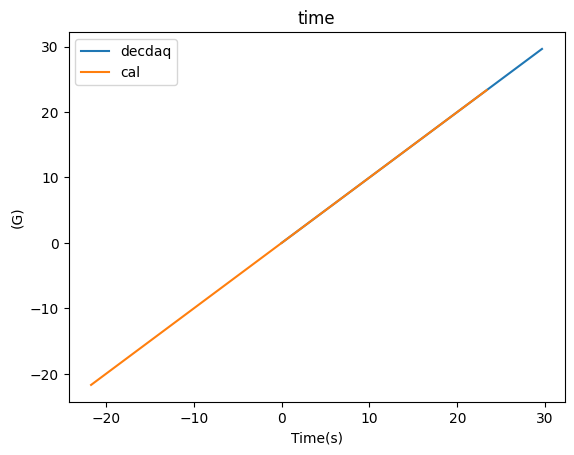

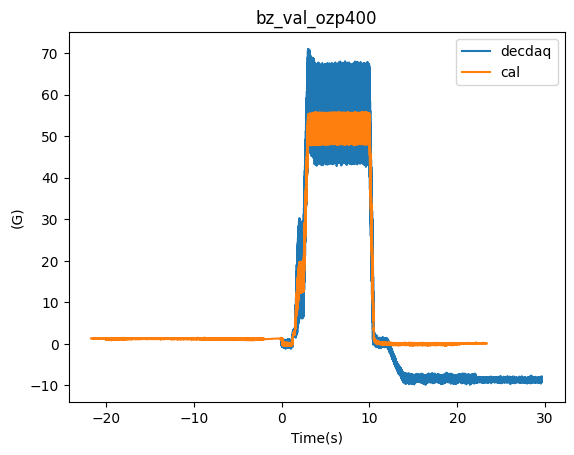

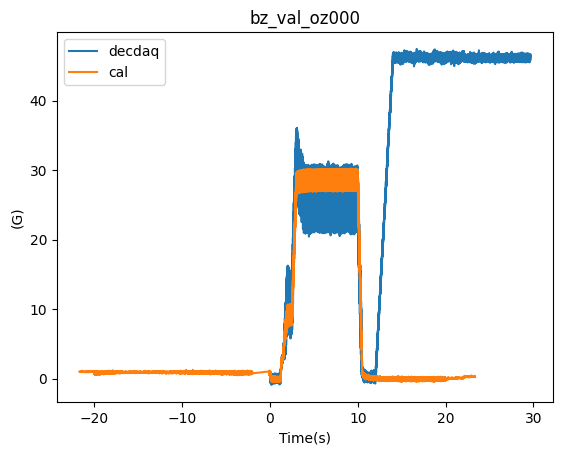

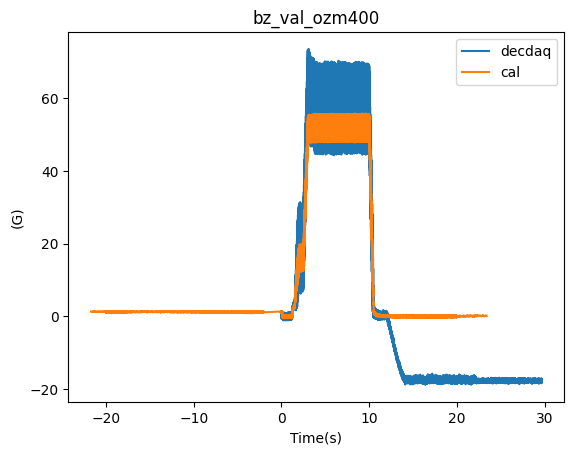

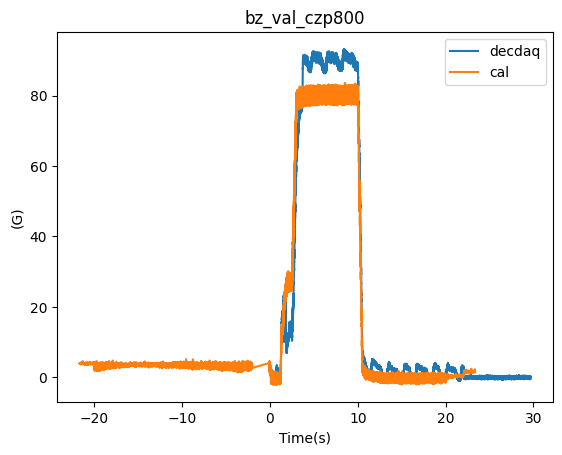

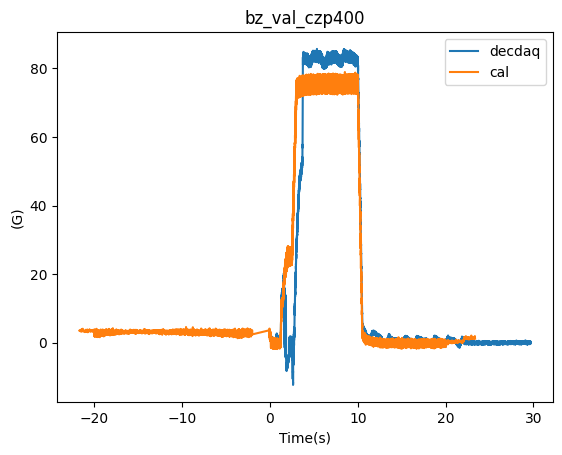

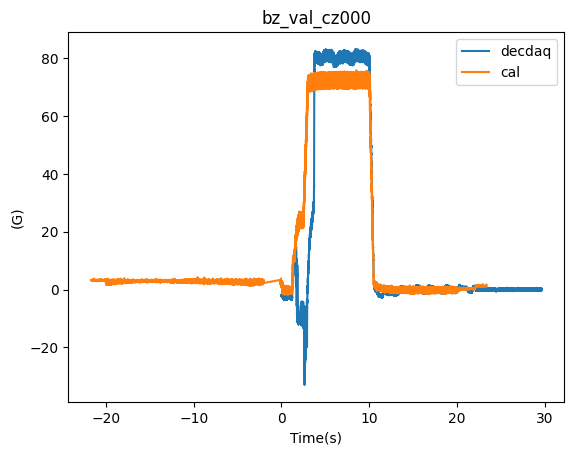

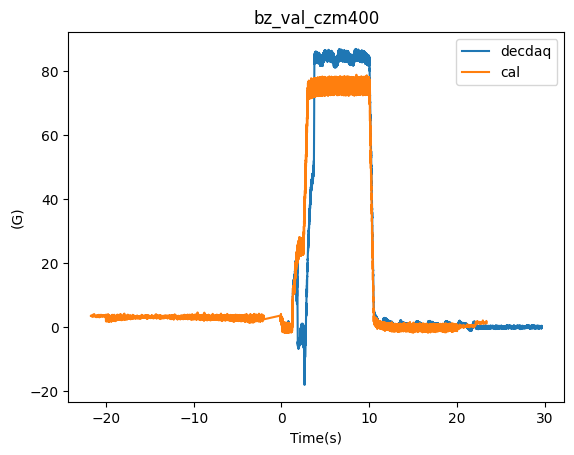

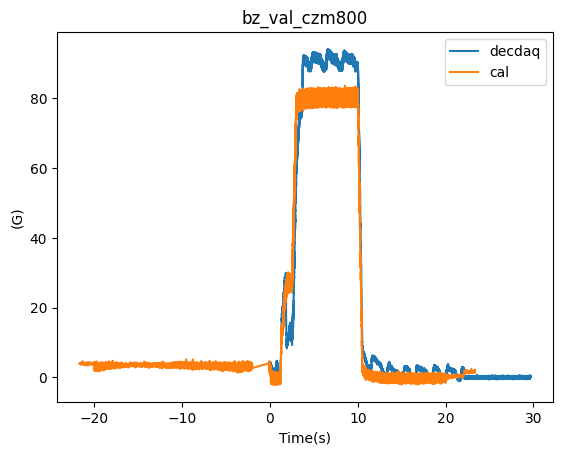

In [11]:
plot_figures1(df1)

In [12]:
def plot_figures2(df):
  res = []
  col = df0.columns
  for cn in col:
    f = plt.figure()
    plt.plot(df['time'], df[cn], label = 'decdaq')
    plt.plot(caldata['time'], caldata[cn], label = 'cal')
    plt.title(cn)
    plt.xlabel('Time(s)')
    plt.xlim(5, 10)
    plt.ylabel('(G)')
    plt.legend()
    #plt.savefig(str(cn)+'lim')
    res.append(f)
  return res

[<Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>,
 <Figure size 640x480 with 1 Axes>]

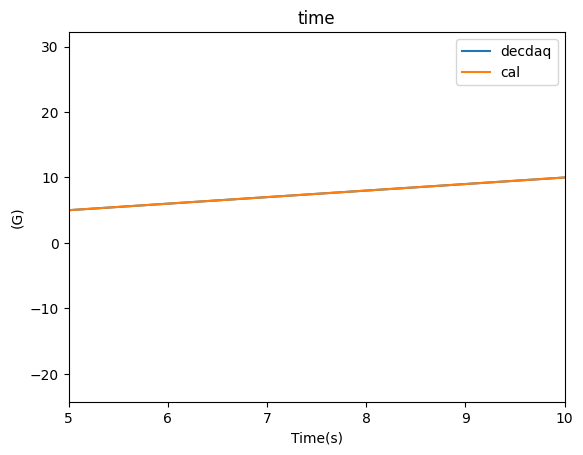

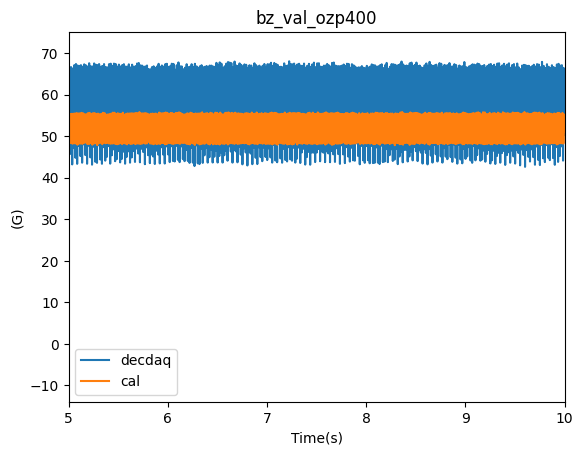

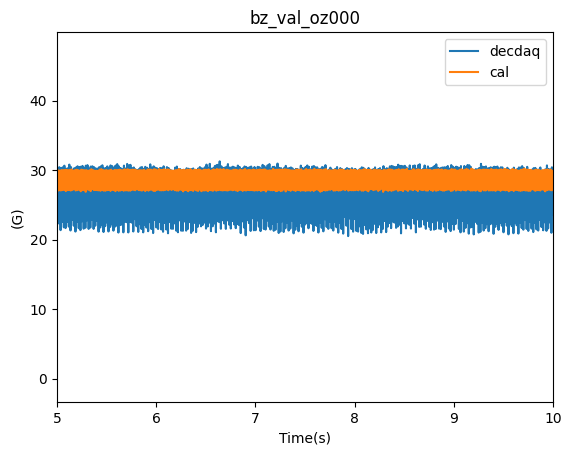

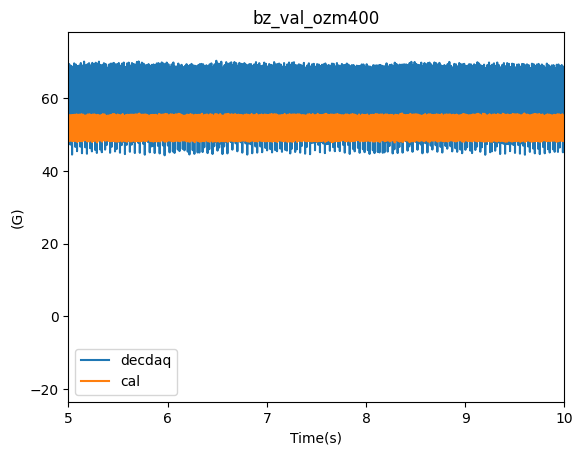

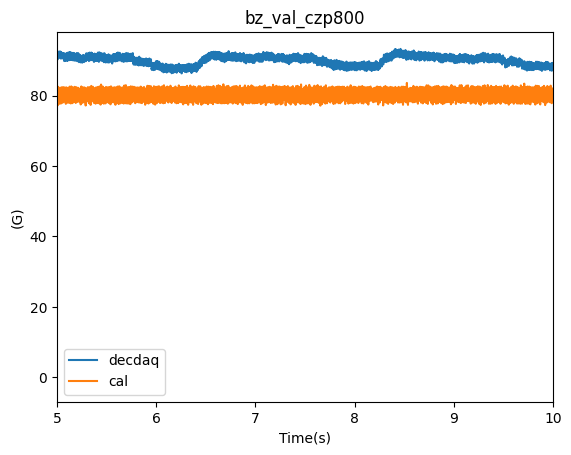

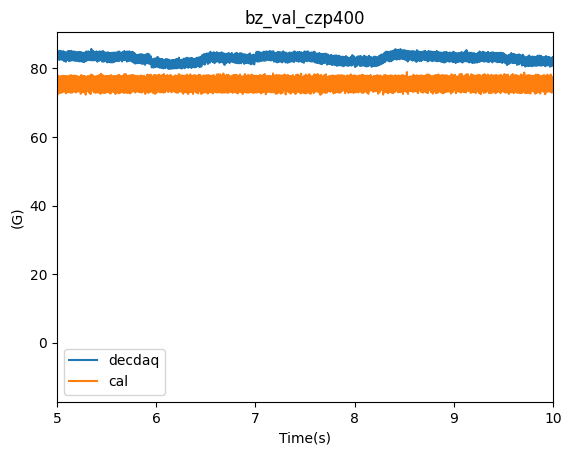

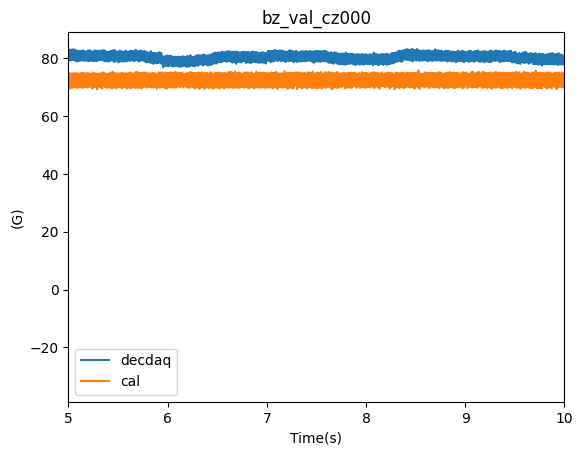

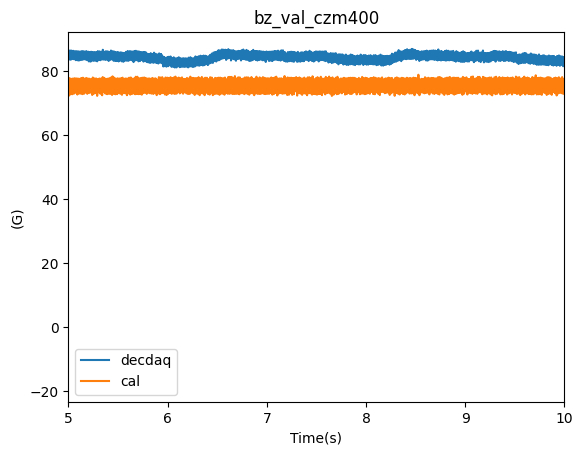

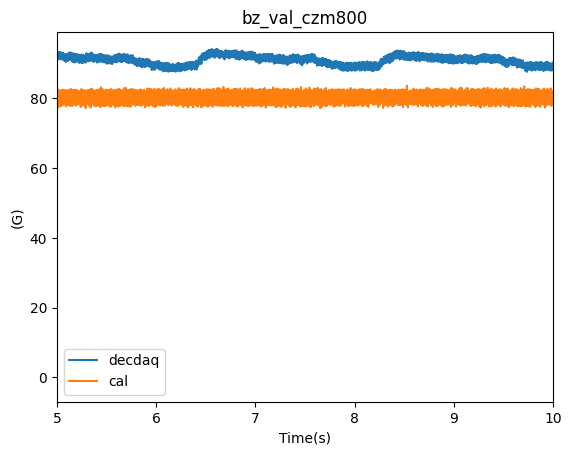

In [13]:
plot_figures2(df1)